Question 1.1)

In [1]:
import pandas as pd
import numpy as np
! git clone https://github.com/DS3001/assignment4
cars = pd.read_csv('./assignment4/data/cars_hw.csv')
#print(cars.head(15))
#OKAY so I am confused about how the price variable and how to scale this into comprehensible terms
cars['Cost'] = np.log(cars['Price'])
print(cars['Cost'].describe())
print(cars['Price'].describe())
print(cars.head(10))
# I created a new variable called Cost which is the price variable with a log transformation performed

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 3.79 MiB/s, done.
count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Cost, dtype: float64
count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  b

In [ ]:
print(cars['Body_Type'].unique())
#COME BACK AND TRY TO CLEAN DATA MORE I GUESS?

['sedan' 'crossover' 'suv' 'hatchback' 'muv']


Question 1.2)

count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Cost, dtype: float64


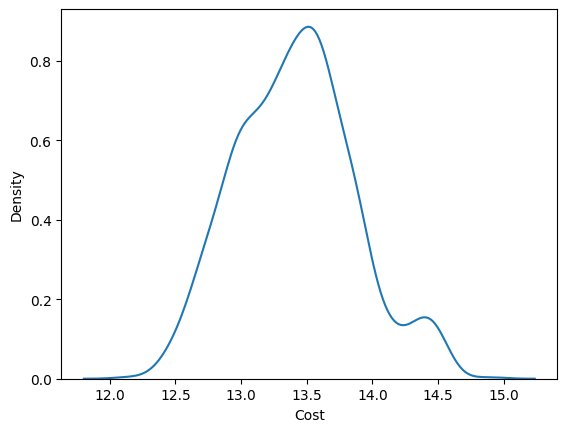

In [2]:
#interpreting summarize the variable as to compute the 5 number summary
# ask for clarification about what he wants from this question
var = 'Cost'
import seaborn as sns
sns.kdeplot(cars[var])
print(cars[var].describe())

We that the log transformation of the price variable reaches a peak density around 13.5.
# ASK ABOUT THIS

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  293.0  13.218132  0.371409  12.375815  12.926348  13.174956   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

<Axes: xlabel='Cost', ylabel='Density'>

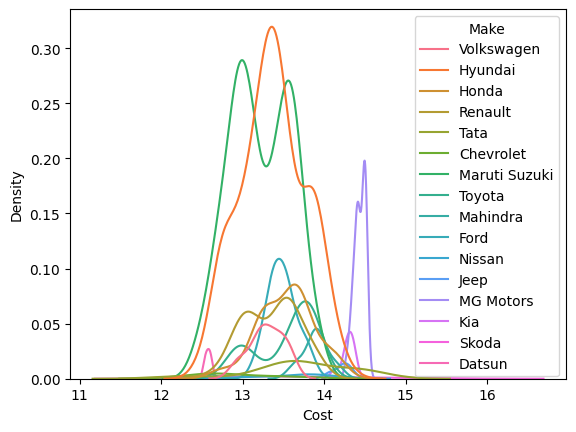

In [3]:
# going to group the data
car_models = cars.groupby('Make')
print(car_models[var].describe())
# going to make a grouped kernel density plot now
var1 = 'Make'
sns.kdeplot(data = cars, x = var, hue = var1)
#print(car_models.head(10))

INTERPRET THE KERNEL DENSITY PLOT; QUESTIONS TO ANSWER ARE THE FOLLOWING:
Which car brands are the most expensive? What do prices look like in general?

The car brands that appear the most expensive are Maruti Suzuki and Hyundai. The prices seem to be concentrated primarily around # ASK ABOUT THIS

Question 1.3

In [4]:
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

In [5]:
y = cars['Cost']
droppers = ['Cost','Price']
X = cars.drop(droppers, axis = 1)
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,test_size=.2,random_state = 100)

Question 1.4)

In [35]:
# only use numerical variables which are - Mileage_Run, Make_year, Seating_Capacity
# remember this is multiple linear regression
#print(y)
cars_x = cars.loc[:,['Mileage_Run','Make_Year','Seating_Capacity']]
#print(cars_x)

def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = np.matmul(X.transpose(),X) # Compute X'X
    Xpy = np.matmul(X.transpose(),y) # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = np.matmul(X,b) # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

reg = mlr(cars_x,y)
print('MLR coefficients: ', reg['b'])
print(reg['rsq'])
# COME BACK AND PRINT THE RMSE

MLR coefficients:  [-3.06395735e-06  6.46715996e-03  9.70847880e-02]
0.08279773731282747


<ipython-input-35-c4e32e689110>:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XpX = np.matmul(X.transpose(),X) # Compute X'X


In [57]:
# only categorical variables
#cars_cx = cars.loc[:,['Body_Type','Make','Color','Fuel_Type','Transmission','Transmission_Type','No_of_Owners']]
# one hot encoding:
new_cars1 = pd.get_dummies(X['Body_Type'],dtype='int')
new_cars2 = pd.get_dummies(X['Make'],dtype='int')
new_cars3 = pd.get_dummies(X['Color'],dtype='int')
new_cars4 = pd.get_dummies(X['Fuel_Type'],dtype='int')
new_cars5 = pd.get_dummies(X['Transmission'],dtype='int')
new_cars6 = pd.get_dummies(X['Transmission_Type'],dtype='int')
new_cars7 = pd.get_dummies(X['No_of_Owners'],dtype='int')
cars_cx = pd.concat([new_cars1, new_cars2, new_cars3, new_cars4, new_cars5, new_cars6, new_cars7], axis=1)
#print(cars_cx)
#  REMEMBER TO DROP THE INTERCEPT TO AVOID OVER DUMMY VARIABLIZING THE VARIABLES
reg = mlr(cars_cx,y)
print('MLR coefficients: ', reg['b'])
print(reg['rsq'])
# COME BACK AND PRINT THE RMSE
# Since this only includes the coefficients that correlate to the one hot encoded variables, do I need to worry about dropping the intercept?

MLR coefficients:  [ 641.34411006  641.07325364  641.2689383   641.41416811  641.50836372
   79.18060471   79.19440228   79.64512336   79.78228935   79.71239614
   79.94346905   80.1245944    80.33942129   79.80145189   79.66102829
   79.78784507   79.63390079   79.65359734   79.91034856   79.88993135
   79.6097561   -94.9242132   -94.79236428  -94.59763089  -94.80015892
  -94.66747494  -94.72014725  -94.81933178  -94.68802151  -94.81477805
  -94.66811303  -95.22780466  -94.70234064  -94.75108684  -94.68779567
  -94.70520231 -370.44952056 -370.60073386 -370.28571429  -61.31505976
  -61.184867    -60.9972663   -60.71549431  -61.01554404  -82.87983821
  -82.98347758  -98.17922158  -98.31667135  -98.4286754 ]
0.6865270275709667


<ipython-input-35-c4e32e689110>:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XpX = np.matmul(X.transpose(),X) # Compute X'X


# COMPARE THE FIRST AND SECOND MODEL

In [59]:
#creating a joint model
cars_jx = pd.concat([cars_cx,cars_x],axis = 1)
#print(cars_jx.head(10))
reg = mlr(cars_jx,y)
print('MLR coefficients: ', reg['b'])
print(reg['rsq'])
# COME BACK AND COMBINE THE RMSE

MLR coefficients:  [-1.37907717e+03 -1.37925136e+03 -1.37937456e+03 -1.37896026e+03
 -1.37884289e+03  1.69701706e+03  1.69688963e+03  1.69721790e+03
  1.69741279e+03  1.69738846e+03  1.69758025e+03  1.69767668e+03
  1.69773926e+03  1.69711759e+03  1.69730077e+03  1.69721412e+03
  1.69711775e+03  1.69754366e+03  1.69731326e+03  1.69747000e+03
  1.69735787e+03  5.85804524e+02  5.85966454e+02  5.85970243e+02
  5.85857360e+02  5.85962730e+02  5.86000936e+02  5.85991515e+02
  5.85907929e+02  5.85982689e+02  5.85971352e+02  5.85656513e+02
  5.85931456e+02  5.85918821e+02  5.85933988e+02  5.85917881e+02
 -1.22490821e+03 -1.22511467e+03 -1.22518098e+03 -1.45645426e+03
 -1.45638223e+03 -1.45626840e+03 -1.45612469e+03 -1.45631530e+03
  1.62053133e+03  1.62045361e+03  2.45134656e+01  2.44601581e+01
  2.43402031e+01 -1.42717153e-07  7.17900109e-02  1.76091458e-01]
0.8328331119516097


<ipython-input-35-c4e32e689110>:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XpX = np.matmul(X.transpose(),X) # Compute X'X


# DETERMINE IF THE JOINT MODEL IS BETTER WHILE COMPARING TO THE OTHER TWO MODELS

Question 1.5)

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures


FINISH THE REST OF THIS QUESTION

Question 3

Question 3.1)

In [7]:
indonesia = pd.read_csv('./assignment4/data/contraception_hw.csv')
print(indonesia.head(10))
tab_contraception = indonesia['method'].value_counts()
print(tab_contraception)

   Unnamed: 0  age  edu  edu_spouse  numberChildren  religion  working  \
0           1   24    2           3               3         1        1   
1           2   45    1           3              10         1        1   
2           3   43    2           3               7         1        1   
3           4   42    3           2               9         1        1   
4           5   36    3           3               8         1        1   
5           6   19    4           4               0         1        1   
6           7   38    2           3               6         1        1   
7           8   21    3           3               1         1        0   
8           9   27    2           3               3         1        1   
9          10   45    1           1               8         1        1   

   spouse_occupation  standardOfLivingIndex  mediaExposure  method  
0                  2                      3              0       1  
1                  3                      4    

Most Indonesian couples in 1987 did not use any forms of contraception

In [8]:
childrenxmethod = pd.crosstab(indonesia['method'],indonesia['numberChildren'], margins = True, margins_name = 'Total')
print(childrenxmethod)


numberChildren   0    1    2    3    4    5   6   7   8   9  10  11  12  13  \
method                                                                        
1               95  143  114   70   57   44  35  18  29   5   9   6   4   0   
2                0   46   56   70   62   36  27  19   9   3   2   2   0   1   
3                2   87  106  119   78   55  30  12   9   8   0   3   0   1   
Total           97  276  276  259  197  135  92  49  47  16  11  11   4   2   

numberChildren  16  Total  
method                     
1                0    629  
2                0    333  
3                1    511  
Total            1   1473  


Couples who use birth control tend to have a smaller number of children compared to couples who do not use any contraceptives.

https://pbpython.com/pandas-crosstab.html

Question 3.2)

In [9]:
indonesia_y = indonesia['method']
dropped = ['method', 'Unnamed: 0']
indonesia_x = indonesia.drop(dropped,axis = 1)
print(indonesia_x)
indonesia_x = indonesia_x.apply(maxmin)
from sklearn.model_selection import train_test_split
indX_Train, indX_Test, indY_Train, indY_Test = train_test_split(indonesia_x,indonesia_y,test_size=.2,random_state =100)

      age  edu  edu_spouse  numberChildren  religion  working  \
0      24    2           3               3         1        1   
1      45    1           3              10         1        1   
2      43    2           3               7         1        1   
3      42    3           2               9         1        1   
4      36    3           3               8         1        1   
...   ...  ...         ...             ...       ...      ...   
1468   33    4           4               2         1        0   
1469   33    4           4               3         1        1   
1470   39    3           3               8         1        0   
1471   33    3           3               4         1        0   
1472   17    3           3               1         1        1   

      spouse_occupation  standardOfLivingIndex  mediaExposure  
0                     2                      3              0  
1                     3                      4              0  
2                     3    

Question 3.3)

DO THE REGRESSION TREE

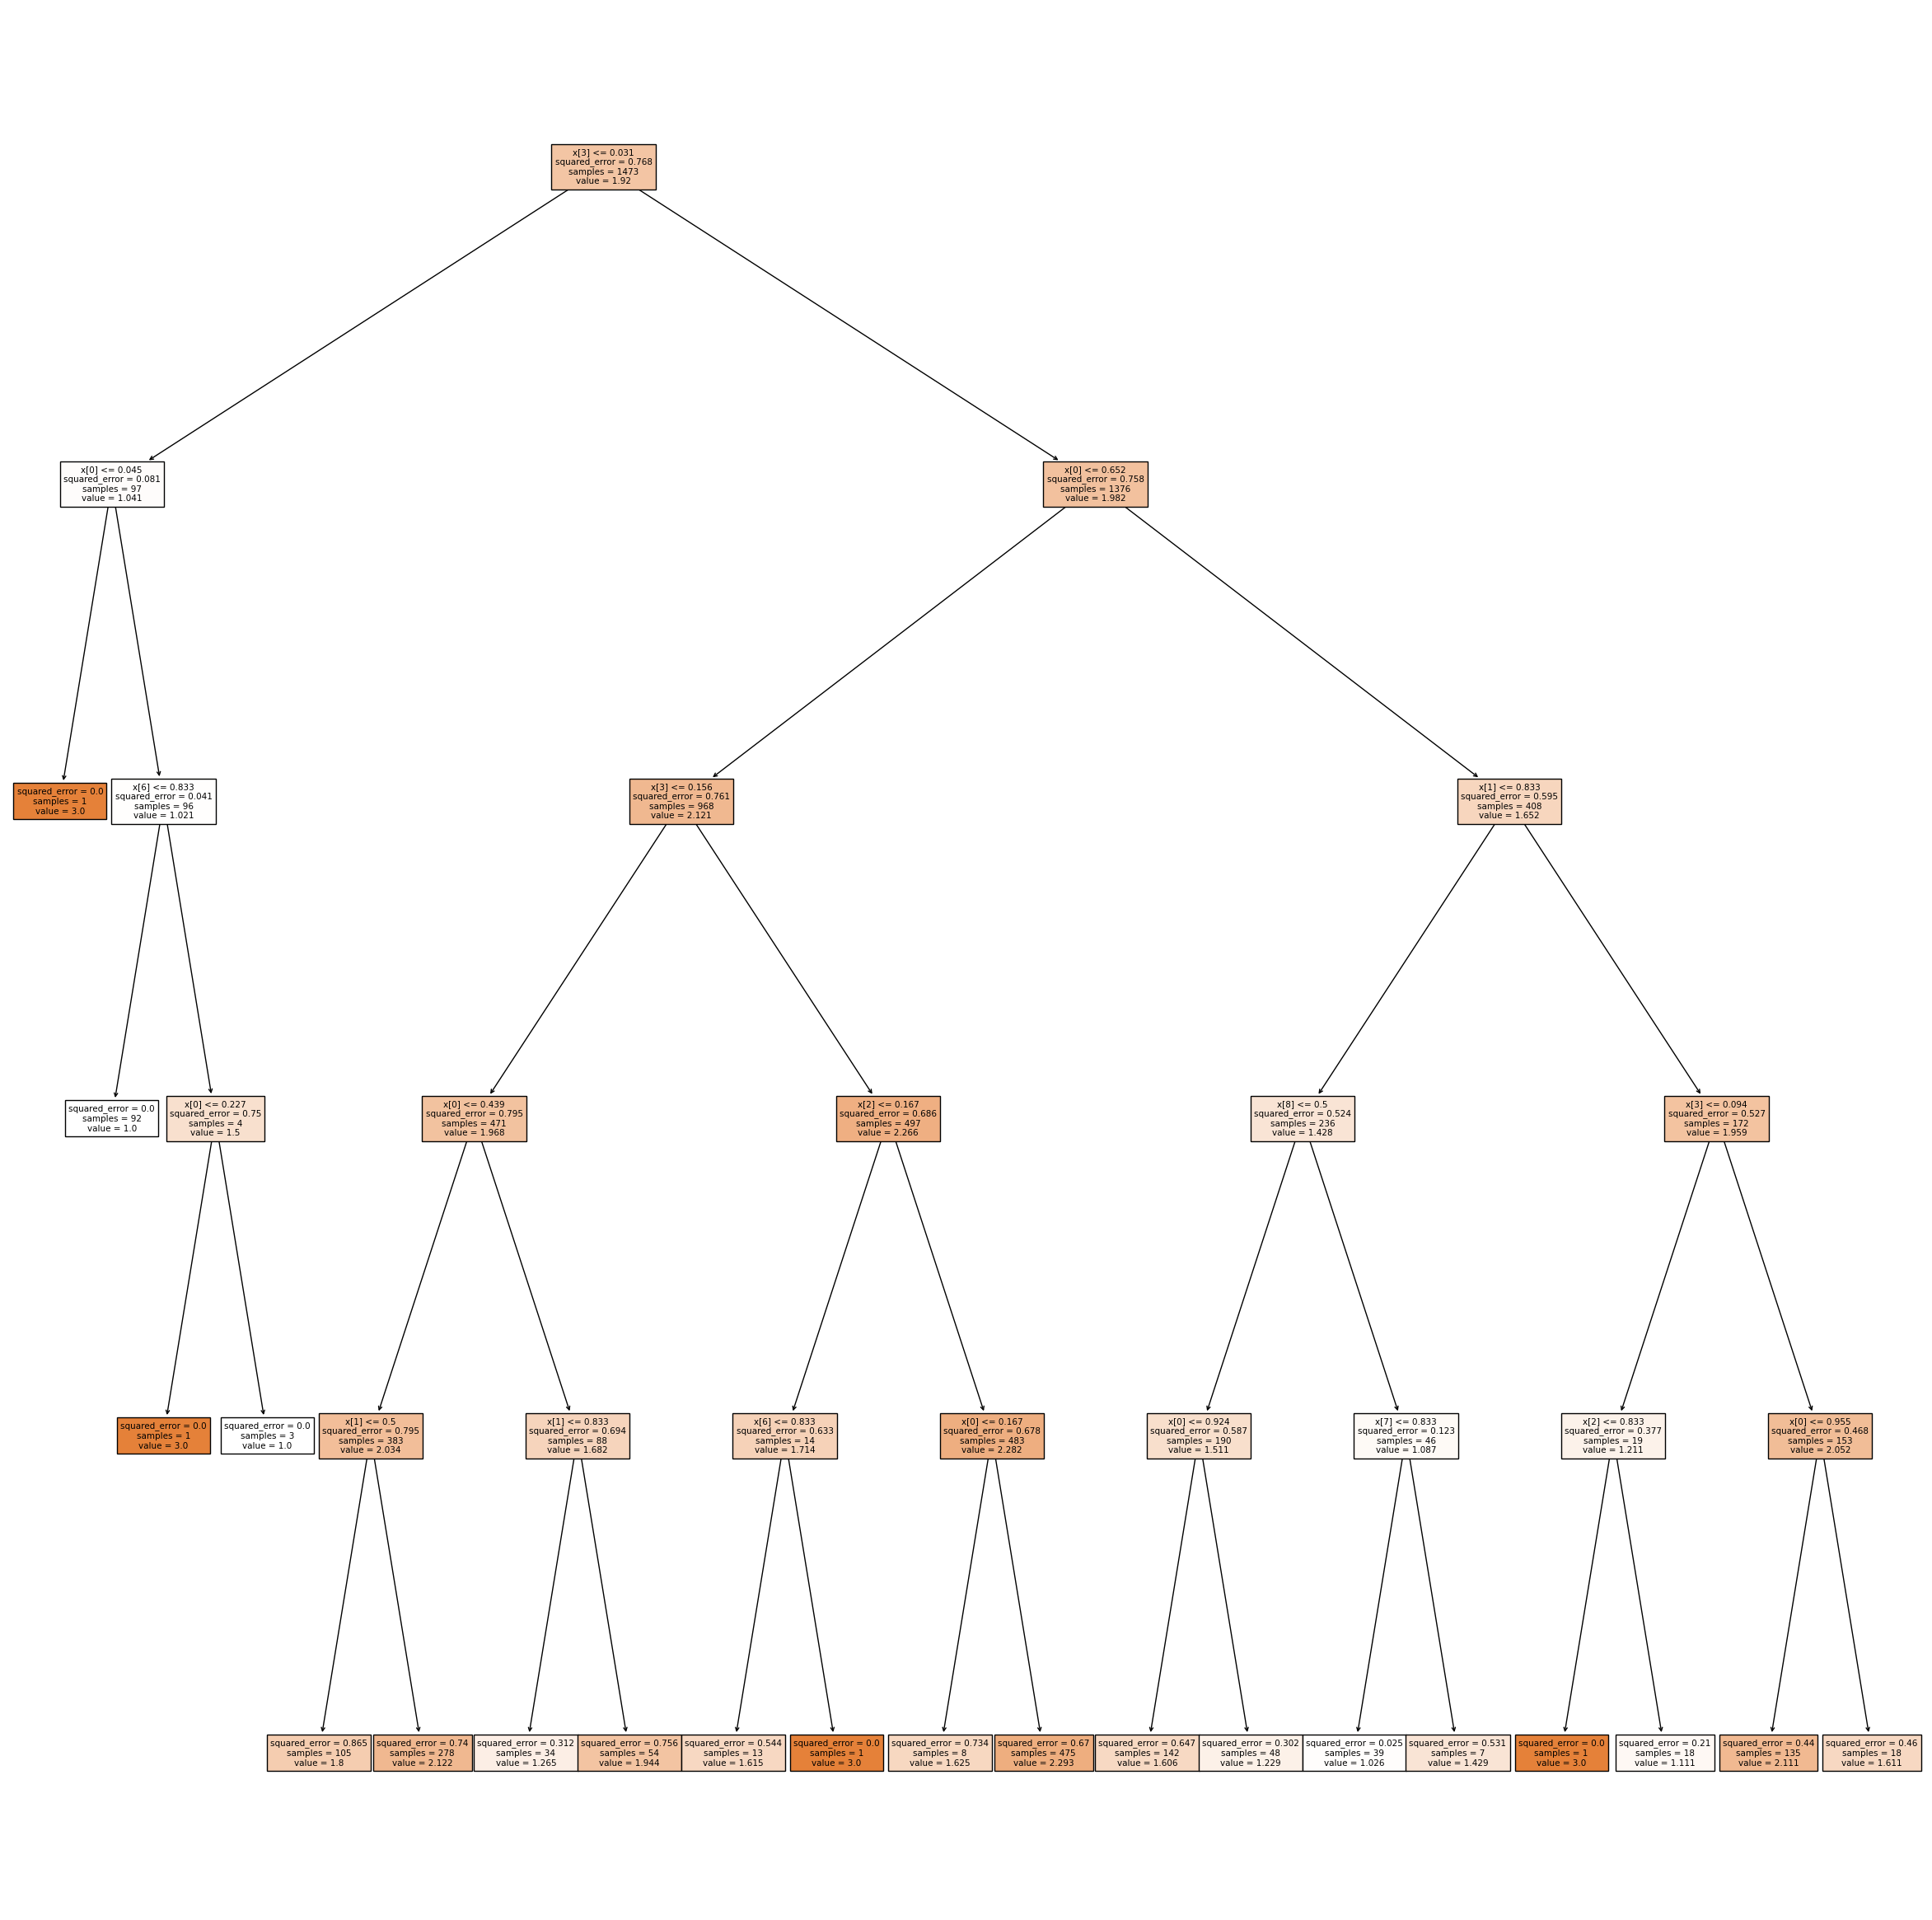

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
cart = tree.DecisionTreeRegressor(max_depth=5)
cart = cart.fit(indonesia_x, indonesia_y)
plt.figure(figsize=(30,30))
tree.plot_tree(cart,filled=True)
plt.show()


The values that the terminal nodes take on in the regression tree take on numbers that are not in the possible range of values. For further explanation, the method values can only take on the values of 1, 2, or 3. However, our model takes on other values such as 2.122 or 1.615. What has gone wrong with our model is that we are using a continous method (regression) to predict a discrete variable (method). A classification tree would hypothetically take on better values.

# ASK ABOUT THISSSSS

Question 3.4)

[Text(0.3711192661206283, 0.9791666666666666, 'x[3] <= 0.031\ngini = 0.646\nsamples = 1473\nvalue = [629, 333, 511]'),
 Text(0.12442176697844652, 0.9375, 'x[0] <= 0.045\ngini = 0.04\nsamples = 97\nvalue = [95, 0, 2]'),
 Text(0.12279508946726311, 0.8958333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12604844448962993, 0.8958333333333334, 'x[6] <= 0.833\ngini = 0.021\nsamples = 96\nvalue = [95, 0, 1]'),
 Text(0.12442176697844652, 0.8541666666666666, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]'),
 Text(0.12767512200081335, 0.8541666666666666, 'x[0] <= 0.227\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.12604844448962993, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12930179951199675, 0.8125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.61781676526281, 0.9375, 'x[0] <= 0.652\ngini = 0.654\nsamples = 1376\nvalue = [534, 333, 509]'),
 Text(0.3766842625305002, 0.8958333333333334, 'x[1] <= 0.833\ngini = 0.641\nsamples = 968\nvalue =

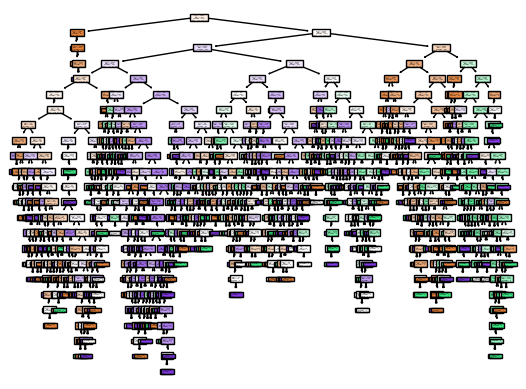

In [12]:
# creating decision tree
contraception_methods = tree.DecisionTreeClassifier()
contraception_methods = contraception_methods.fit(indonesia_x, indonesia_y)
tree.plot_tree(contraception_methods,filled = True)


# INTERPRET THIS


Question 3.5

In [13]:
y_hat = contraception_methods.predict(indX_Test)
matrix = pd.crosstab(indY_Test,y_hat)
print(matrix)

col_0     1   2   3
method             
1       126   0   1
2         2  62   0
3         5   8  91


In [14]:
# going to compute the overall accuracy
# formula =
# TP + TN /
# ALL of the data
accuracy = (matrix.iloc[0,0]+matrix.iloc[1,1]+matrix.iloc[2,2])/(matrix.iloc[0,0]+matrix.iloc[1,1]+matrix.iloc[2,2]+matrix.iloc[1,0]+matrix.iloc[2,0]+matrix.iloc[0,1]+matrix.iloc[2,1]+matrix.iloc[0,2]+matrix.iloc[1,2])
print('The overall accuracy of the model is: ', accuracy, '\n')

The overall accuracy of the model is:  0.9457627118644067 



In [24]:
one = matrix.iloc[1,0]
two = matrix.iloc[2,0]
three = matrix.iloc[0,1]
four = matrix.iloc[0,2]
FIVE = matrix.iloc[1,2]
six = matrix.iloc[2,1]
print(one)
print(two)
print(three)
print(four)
print(FIVE)
print(six)
# REMEMBER THAT ILOC GOES [ROW,COLUMN] !!!!!

2
5
0
1
0
8


# CONFIRM THAT I AM CALCULATING THE ACCURACY CORRECTLY

In [18]:
#accuracy for method 1
method1_accuracy = (matrix.iloc[0,0])/(matrix.iloc[0,0]+matrix.iloc[0,1]+matrix.iloc[0,2])
print(method1_accuracy)


0.9921259842519685


In [23]:
#accuracy for method 2
method2_accuracy = (matrix.iloc[1,1])/(matrix.iloc[1,1]+matrix.iloc[1,0]+matrix.iloc[1,2])
print(method2_accuracy)

0.96875


In [25]:
#accuracy for method 3
method2_accuracy = (matrix.iloc[2,2])/(matrix.iloc[2,2]+matrix.iloc[2,0]+matrix.iloc[2,1])
print(method2_accuracy)

0.875


Question 3.6

It is not ideal to use a linear probability model for this exercise because linear regression is suitable for predicting continuous numerical data, not discrete categorical data. Since we were trying to project an Indonesian couple's contraceptive methods which can only take on three different values which correlates to a categorical contraceptive model, linear regression would give us values that don't specifically correlate to the data we are trying to plot. As previously seen, linear models would give us 1.04 or 2.921, which doesnt fit our categories. While one could round the variables up or down, this would,nt account for the nuance that makes one couple a 1.04 versus a simple 1.